In [1]:
import imageio as im 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nn.network import Neural_Network
from nn.activation import Sigmoid

In [3]:
#read mnist train
path_train = "mnist_dataset/mnist_train.csv"
with open(path_train) as f:
    mnist_train = list(f)
    
#read mnist test 
path_test = "mnist_dataset/mnist_test.csv"
with open(path_test) as f:
    mnist_test = list(f)

In [4]:
# functions that prepare mnist dataset 

# convert csv into float array and exlcude first element
str_to_arr =  lambda s: np.asfarray(s.split(',')[1:])

# rescale the inputs (0,255) to (0.01, 0.99)
rescale_inputs = lambda i: str_to_arr(i)*(0.98/255) + 0.01

# create target output values: 0.99 for true value else 0.01
def rescale_outputs(record,nodes):
    outputs = np.ones(nodes)*0.01
    outputs[int(record[0])] = 0.99
    
    return outputs


In [5]:
# inputs nodes are pixel values of each digit: 28 * 28 = 784
i_nodes = 784 
#hidden nodes are chosen arbitrarily
h_nodes = 100
#output nodes are 10: 0 to 9
o_nodes = 10

# create instance of neural network
mnist_nn = Neural_Network(i_nodes,h_nodes,o_nodes, Sigmoid)

In [6]:
# function that trains network
def train(network, epochs, l_rate):
    for epoch in range(epochs):
        for record in mnist_train:
            inputs = rescale_inputs(record)
            targets = rescale_outputs(record,o_nodes)
            network.backward_propagation(inputs, targets,l_rate) 

In [7]:
epochs, l_rate  = 1, 0.1
train(mnist_nn, epochs, l_rate)
epochs, l_rate  = 1, 0.05
train(mnist_nn, epochs, l_rate)

In [8]:
#test the network
#scorecard of how well network performs
scorecard = []

for record in mnist_test:
    correct_label = int(record.split(',')[0])
    # print(f'correct label: {correct_label}')
    prediction = mnist_nn.foward_propagation(rescale_inputs(record))[2].flatten().argmax()
    # print(f'predicted label: {prediction}')
    # print('---')
    scorecard.append(correct_label==prediction)

perc = np.count_nonzero(scorecard) / len(scorecard) *100

print(f'Correct predictions: {np.count_nonzero(scorecard)}')
print(f'Incorrect predictions: {np.count_nonzero(np.invert(scorecard))}')
print(f'Performance: {perc:.2f}%')
print(f'Error: {100 - perc:.2f}%')

Correct predictions: 9642
Incorrect predictions: 358
Performance: 96.42%
Error: 3.58%


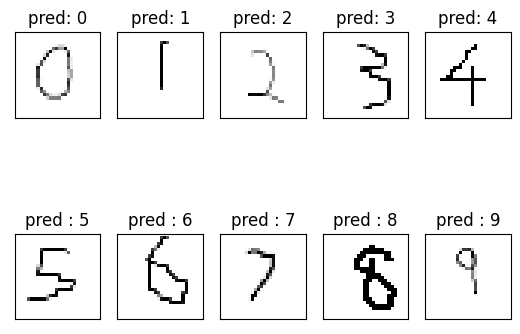

In [9]:
fig, axes =  fig, axes = plt.subplots(2, 5)
digits = ['zero','one','two','three', 'four','five','six','seven','eight','nine']


for i in range(len(digits)):
    img_array = im.v2.imread(f'imgs/{digits[i]}.png',as_gray=True)
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data/255 * 0.98) + 0.01
    if i <= 4: 
        axes[0, i].imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
        axes[0,i].set_title(f'pred: {mnist_nn.foward_propagation(img_data)[2].flatten().argmax()}')
        axes[0,i].set_xticks([])
        axes[0,i].set_yticks([])
    else:
        axes[1, i-5].imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
        axes[1,i-5].set_title(f'pred : {mnist_nn.foward_propagation(img_data)[2].flatten().argmax()}')
        axes[1,i-5].set_xticks([])
        axes[1,i-5].set_yticks([])